 Roll no: 1212
 <br/>
 Name: Atharva Deshpande 

##Restaurant Tip Prediction

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips.

Can you predict the tip amount?

We will use a linear regression model to make our predictions



##Dataset details:

**total_bill:** bill in dollars

**tip:** tip in dollars

**sex:** sex of the bill payer

**smoker:** whether there were smokers in the party

**day:** day of the week

**time:** time of day

**size:** size of the party

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/tips.csv')

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.describe(include='all')#O stands for object, include all object types in description also.

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Data Preprocessing



In [ ]:
# Binary encoding
df['sex'] = df['sex'].replace({'Female': 0, 'Male': 1})
df['smoker'] = df['smoker'].replace({'No': 0, 'Yes': 1})
df['time'] = df['time'].replace({'Lunch': 0, 'Dinner': 1})
    
# Ordinal encoding
df['day'] = df['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

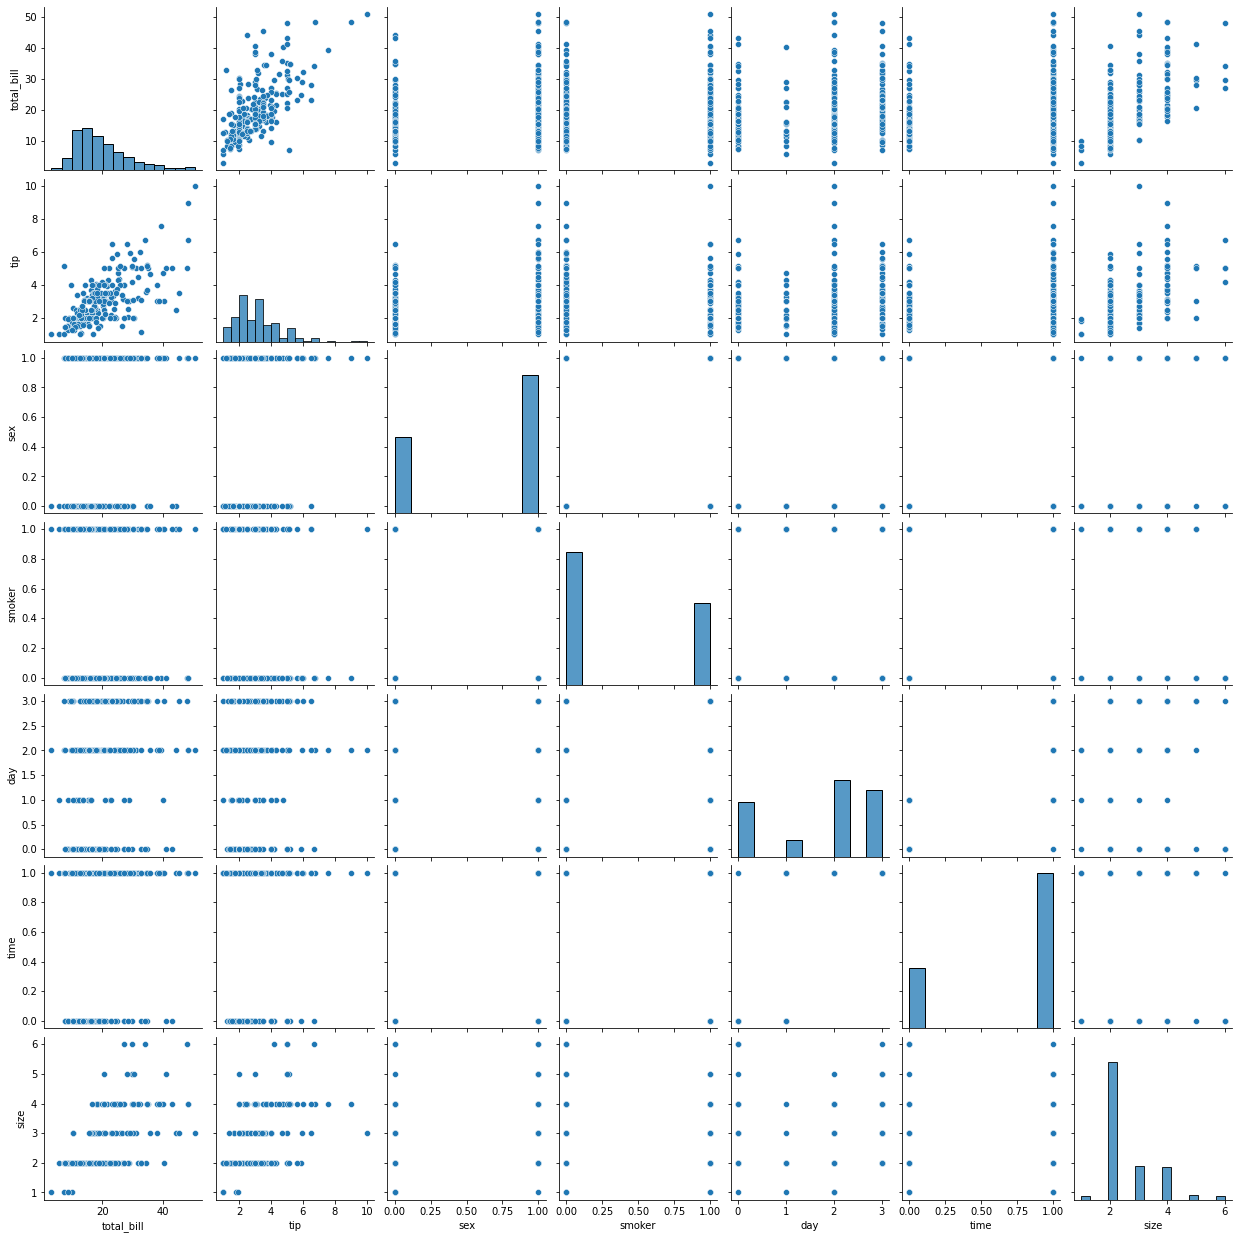

In [ ]:
sns.pairplot(df)

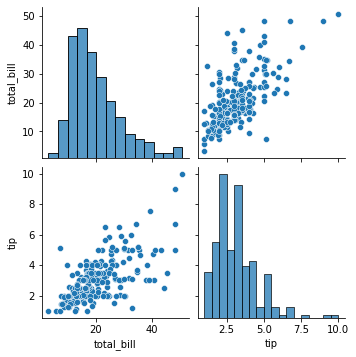

In [ ]:
sns.pairplot(df.loc[:, ['total_bill', 'tip']])

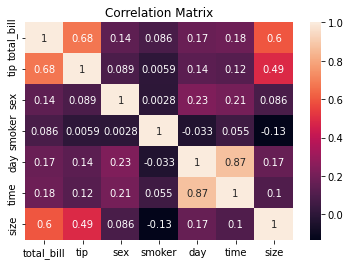

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df.drop('tip', axis=1)
y=df['tip']

In [ ]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
X_train

,total_bill,sex,smoker,day,time,size
0,-0.286119,-1.398051,-0.740013,1.067855,0.642685,-0.577669
154,0.026959,0.715282,-0.740013,1.067855,0.642685,1.470429
167,1.371620,0.715282,-0.740013,1.067855,0.642685,1.470429
110,-0.622848,0.715282,-0.740013,0.228211,0.642685,-0.577669
225,-0.367204,-1.398051,1.351328,-0.611433,-1.555973,-0.577669
...,...,...,...,...,...,...
137,-0.605955,-1.398051,-0.740013,-1.451077,-1.555973,-0.577669
72,0.825422,-1.398051,1.351328,0.228211,0.642685,-0.577669
140,-0.232063,-1.398051,-0.740013,-1.451077,-1.555973,-0.577669
235,-1.065437,0.715282,-0.740013,0.228211,0.642685,-0.577669


In [ ]:
cols=X_train.columns
cols

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
# Linear Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train_lr= lr.predict(X_train)
y_pred_test_lr= lr.predict(X_test)


print('Train data results')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr)) 
print('RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))

print('===============================')

print('Test data results')
print('MAE:', mean_absolute_error(y_test, y_pred_test_lr))
print('MSE:', mean_squared_error(y_test, y_pred_test_lr)) 
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_test_lr)))


print('===============================')
print('R2:', r2_score(y_test,y_pred_test_lr))

Train data results
MAE: 0.736778390814171
MSE: 0.9550064754975957
RMSE: 0.9772443274317818
Test data results
MAE: 0.7702697114590884
MSE: 1.322309180056858
RMSE: 1.1499170318144079
R2: 0.49755299573499756


In [ ]:
# Print the regression coefficient and intercept
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [ 0.71690162 -0.02938103 -0.06006661  0.01909667 -0.05355785  0.23237291]
Intercept:  2.934923076923077


In [ ]:
print('"Linear Regression"')
eq=""
for i in range(0,6):
   eq=eq + str(cols[i]) + "*" + str(lr.coef_[i]) + " + "
print('tip=', eq, lr.intercept_)

"Linear Regression"
tip= total_bill*0.71690161929746 + sex*-0.029381034423360902 + smoker*-0.06006660953651381 + day*0.01909666639757926 + time*-0.05355784642214491 + size*0.23237290692583096 +  2.934923076923077


In [ ]:
# Ridge regression
lrR = Ridge(alpha=0.01)
lrR.fit(X_train, y_train)

y_pred_train_lr= lrR.predict(X_train)
y_pred_test_lr= lrR.predict(X_test)

print('Train data results')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr)) 
print('RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))

print('===============================')

print('Test data results')
print('MAE:', mean_absolute_error(y_test, y_pred_test_lr))
print('MSE:', mean_squared_error(y_test, y_pred_test_lr)) 
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_test_lr)))


print('===============================')
print('R2:', r2_score(y_test,y_pred_test_lr))

Train data results
MAE: 0.7367790889092718
MSE: 0.9550064772691734
RMSE: 0.9772443283381969
Test data results
MAE: 0.7702872508515176
MSE: 1.3223452746534463
RMSE: 1.1499327261424672
R2: 0.4975392806204091


In [ ]:
# Print the regression coefficient and intercept
print ('Coefficients: ', lrR.coef_)
print ('Intercept: ',lrR.intercept_)

Coefficients:  [ 0.71685016 -0.02937359 -0.06005688  0.01908326 -0.05353868  0.23239195]
Intercept:  2.934923076923077


In [ ]:
print('"Ridge Regression"')
eq=""
for i in range(0,6):
   eq=eq + str(cols[i]) + "*" + str(lrR.coef_[i]) + " + "
print('tip=', eq, lrR.intercept_)

"Ridge Regression"
tip= total_bill*0.7168501649597961 + sex*-0.02937359086882067 + smoker*-0.060056880942467764 + day*0.019083263671716914 + time*-0.05353867628667725 + size*0.23239194506771998 +  2.934923076923077


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
lrL = Lasso(alpha=0.01)
lrL.fit(X_train, y_train)

y_pred_train_lr= lrL.predict(X_train)
y_pred_test_lr= lrL.predict(X_test)

print('Train data results')
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_lr)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lr)))

print('===============================')

print('Test data results')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_lr)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lr)))

print('===============================')
print('R2:', r2_score(y_test,y_pred_test_lr))

Train data results
MAE: 0.737059991291139
MSE: 0.9555567210591993
RMSE: 0.9775258160576626
Test data results
MAE: 0.7754073515827311
MSE: 1.3220859446369737
RMSE: 1.1498199618361884
R2: 0.49763782004814494


In [ ]:
# Print the regression coefficient and intercept
print ('Coefficients: ', lrL.coef_)
print ('Intercept: ',lrL.intercept_)

Coefficients:  [ 0.70457349 -0.0175331  -0.05054914 -0.         -0.02697635  0.22932472]
Intercept:  2.934923076923077


In [ ]:
print('"Lasso Regression"')
eq=""
for i in range(0,6):
   eq=eq + str(cols[i]) + "*" + str(lrL.coef_[i]) + " + "
print('tip=', eq, lrL.intercept_)

"Lasso Regression"
tip= total_bill*0.7045734878315298 + sex*-0.017533103221071482 + smoker*-0.05054913651437985 + day*-0.0 + time*-0.026976346966410752 + size*0.22932471748883088 +  2.934923076923077


In [ ]:
# ELastic Net Regression
from sklearn.linear_model import ElasticNet
lrE = ElasticNet(alpha=0.01)
lrE.fit(X_train, y_train)

y_pred_train_lr= lrE.predict(X_train)
y_pred_test_lr= lrE.predict(X_test)

print('Train data results')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr)) 
print('RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))

print('===============================')

print('Test data results')
print('MAE:', mean_absolute_error(y_test, y_pred_test_lr))
print('MSE:', mean_squared_error(y_test, y_pred_test_lr)) 
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_test_lr)))

print('===============================')
print('R2:', r2_score(y_test,y_pred_test_lr))

Train data results
MAE: 0.7371268009090153
MSE: 0.9552645173114231
RMSE: 0.9773763437445288
Test data results
MAE: 0.7743562415653457
MSE: 1.3260092610063157
RMSE: 1.1515247548386947
R2: 0.4961470502748647


In [ ]:
# # Print the regression coefficient and intercept
print ('Coefficients: ', lrE.coef_)
print ('Intercept: ',lrE.intercept_)

Coefficients:  [ 0.70590773 -0.02239052 -0.05518221 -0.         -0.03123552  0.23296046]
Intercept:  2.934923076923077


In [ ]:
print('"Elastic Net Regression"')
eq=""
for i in range(0,6):
   eq=eq + str(cols[i]) + "*" + str(lrE.coef_[i]) + " + "
print('tip=', eq, lrE.intercept_)

"Elastic Net Regression"
tip= total_bill*0.7059077278650976 + sex*-0.0223905157342399 + smoker*-0.05518220991174853 + day*-0.0 + time*-0.031235522883760792 + size*0.23296046018744423 +  2.934923076923077
